### Technical_Challenge

### You should aim for:

1. Exploratory data analysis

2. Get to know the domain

3. Explore your data

4. Clean your data

5. Take a look and find connections between data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics


from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from PIL import Image
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv("measurements.csv")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
df_excel = pd.read_excel("measurements2.xlsx")
df_excel

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


### Data cleaning

In [4]:
# Data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
column_value_counts = df.count()
column_value_counts

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [6]:
df.isnull().any()

distance         False
consume          False
speed            False
temp_inside       True
temp_outside     False
specials          True
gas_type         False
AC               False
rain             False
sun              False
refill liters     True
refill gas        True
dtype: bool

In [7]:
df.isnull().any().sum()

4

In [8]:
# Data transform
columns_to_convert = ["distance", "consume","temp_inside"]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

In [9]:
# Editing Null Values/ Remove 'specials', 'refill liters', 'refill gas' 
columns_to_remove = ["specials", "refill liters", "refill gas"]
df = df.drop(columns=columns_to_remove)

In [10]:
# Null values preparation for 'temp_inside'
column_means = df.mean()

df.fillna(column_means, inplace=True)
df

C:\Users\ivann\AppData\Local\Temp\ipykernel_3096\2064355159.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.000000,5.000000,26,21.934911,12,E10,0,0,0
1,12.000000,4.816327,30,21.934911,13,E10,0,0,0
2,19.596154,4.816327,38,21.934911,15,E10,0,0,0
3,19.596154,4.816327,36,21.934911,14,E10,0,0,0
4,19.596154,4.816327,46,21.934911,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,SP98,0,0,0
384,19.596154,4.816327,38,25.000000,31,SP98,1,0,0
385,16.000000,4.816327,45,25.000000,19,SP98,0,0,0
386,19.596154,4.816327,42,25.000000,31,SP98,1,0,0


In [11]:
column_value_counts = df.count()
column_value_counts

distance        388
consume         388
speed           388
temp_inside     388
temp_outside    388
gas_type        388
AC              388
rain            388
sun             388
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [13]:
df.isnull().any()

distance        False
consume         False
speed           False
temp_inside     False
temp_outside    False
gas_type        False
AC              False
rain            False
sun             False
dtype: bool

In [14]:
df['gas_type'].value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [15]:
df['rain'].value_counts()

0    340
1     48
Name: rain, dtype: int64

In [16]:
df['sun'].value_counts()

0    356
1     32
Name: sun, dtype: int64

In [17]:
df['AC'].value_counts()

0    358
1     30
Name: AC, dtype: int64

In [18]:
df['distance'].value_counts()

19.596154     336
16.000000      24
13.000000       5
19.000000       5
2.000000        4
14.000000       2
17.000000       2
29.000000       1
21.000000       1
211.000000      1
32.000000       1
28.000000       1
39.000000       1
7.000000        1
12.000000       1
20.000000       1
6.000000        1
Name: distance, dtype: int64

In [19]:
# Create a new value/column 'Liter'
df['Liter'] = df['consume'] * df['distance']
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,Liter
0,28.000000,5.000000,26,21.934911,12,E10,0,0,0,140.000000
1,12.000000,4.816327,30,21.934911,13,E10,0,0,0,57.795918
2,19.596154,4.816327,38,21.934911,15,E10,0,0,0,94.381476
3,19.596154,4.816327,36,21.934911,14,E10,0,0,0,94.381476
4,19.596154,4.816327,46,21.934911,15,E10,0,0,0,94.381476
...,...,...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,SP98,0,0,0,77.061224
384,19.596154,4.816327,38,25.000000,31,SP98,1,0,0,94.381476
385,16.000000,4.816327,45,25.000000,19,SP98,0,0,0,77.061224
386,19.596154,4.816327,42,25.000000,31,SP98,1,0,0,94.381476


In [20]:
# Adding Cost by Type of Gas
# Define the multiplier values based on gas_type
gas_ratio = {
    'E10': 1.38,
    'SP98': 1.46 }

In [21]:
# Function to apply the multiplier based on gas_type
def apply_multiplier(row):
    
    return row['Liter'] * gas_ratio.get(row['gas_type'], 1)  # Use 1 as default if gas_type not found in multipliers

In [22]:
# Apply the function to create a new column "Adjusted_Liter"
df['Cost by Type of Gas'] = df.apply(apply_multiplier, axis=1)

In [23]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,Liter,Cost by Type of Gas
0,28.000000,5.000000,26,21.934911,12,E10,0,0,0,140.000000,193.200000
1,12.000000,4.816327,30,21.934911,13,E10,0,0,0,57.795918,79.758367
2,19.596154,4.816327,38,21.934911,15,E10,0,0,0,94.381476,130.246436
3,19.596154,4.816327,36,21.934911,14,E10,0,0,0,94.381476,130.246436
4,19.596154,4.816327,46,21.934911,15,E10,0,0,0,94.381476,130.246436
...,...,...,...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,SP98,0,0,0,77.061224,112.509388
384,19.596154,4.816327,38,25.000000,31,SP98,1,0,0,94.381476,137.796954
385,16.000000,4.816327,45,25.000000,19,SP98,0,0,0,77.061224,112.509388
386,19.596154,4.816327,42,25.000000,31,SP98,1,0,0,94.381476,137.796954


In [24]:
df_new = df
df_new

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,Liter,Cost by Type of Gas
0,28.000000,5.000000,26,21.934911,12,E10,0,0,0,140.000000,193.200000
1,12.000000,4.816327,30,21.934911,13,E10,0,0,0,57.795918,79.758367
2,19.596154,4.816327,38,21.934911,15,E10,0,0,0,94.381476,130.246436
3,19.596154,4.816327,36,21.934911,14,E10,0,0,0,94.381476,130.246436
4,19.596154,4.816327,46,21.934911,15,E10,0,0,0,94.381476,130.246436
...,...,...,...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,SP98,0,0,0,77.061224,112.509388
384,19.596154,4.816327,38,25.000000,31,SP98,1,0,0,94.381476,137.796954
385,16.000000,4.816327,45,25.000000,19,SP98,0,0,0,77.061224,112.509388
386,19.596154,4.816327,42,25.000000,31,SP98,1,0,0,94.381476,137.796954


In [25]:
df_new.to_csv("gas_analysis_cost.csv", index=False)

In [26]:
df_new['Liter'].max()

1016.2448979591837

In [27]:
filtered_df = df_new[(df_new['distance'] == 28)]

In [28]:
filtered_df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,Liter,Cost by Type of Gas
0,28.0,5.0,26,21.934911,12,E10,0,0,0,140.0,193.2


In [29]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()

print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'Liter', 'Cost by Type of Gas']


distance
Skew : 17.57


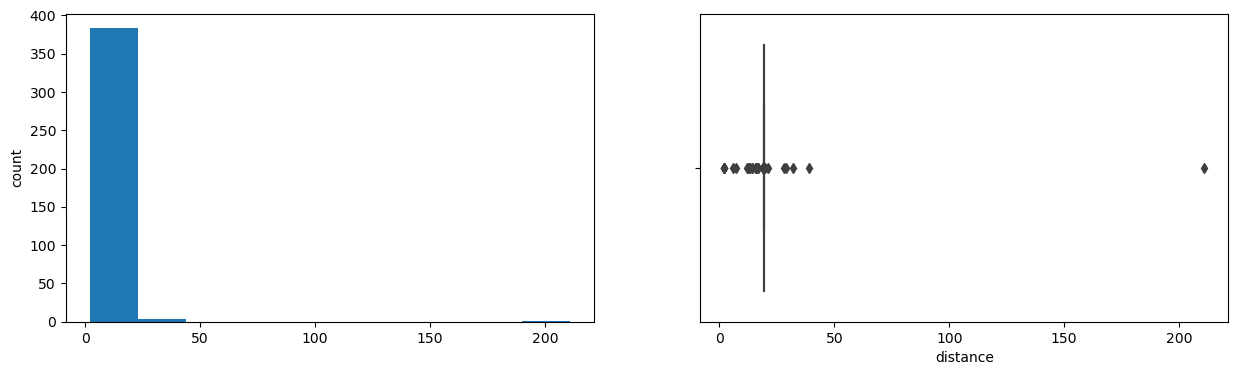

consume
Skew : 6.66


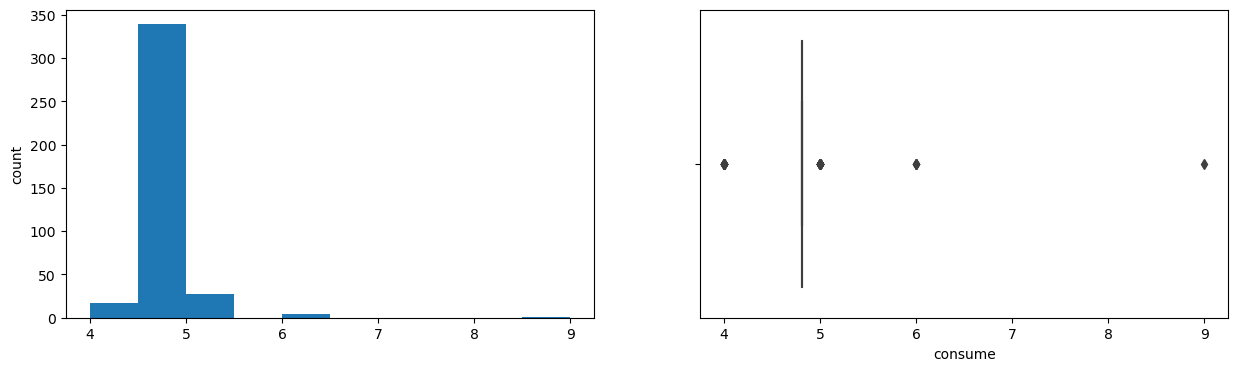

speed
Skew : 0.75


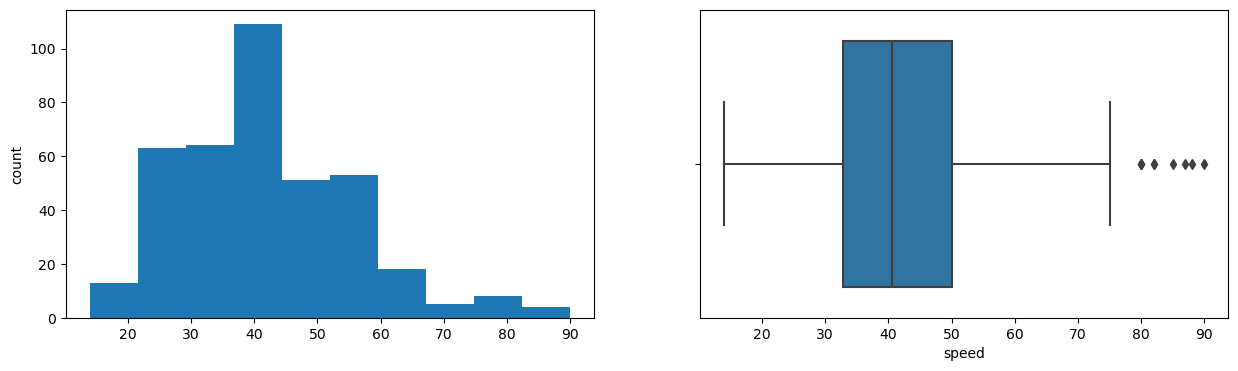

temp_inside
Skew : 0.83


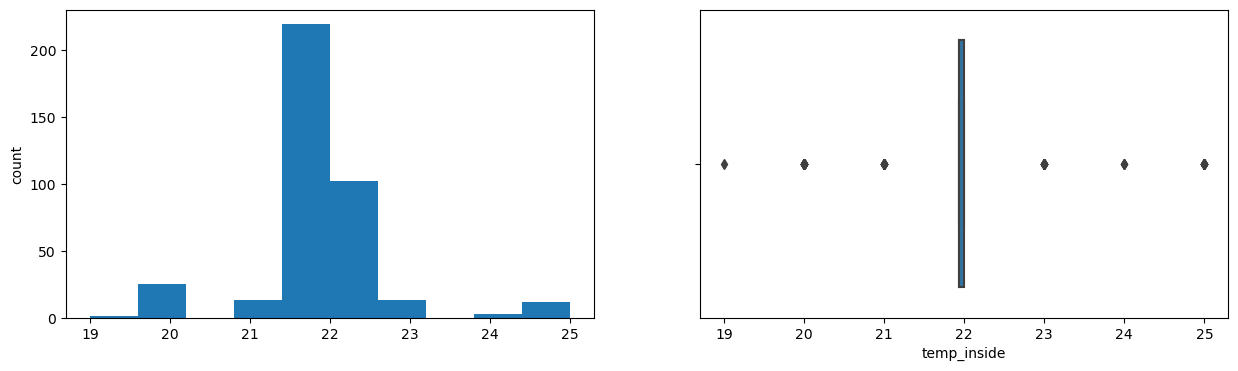

temp_outside
Skew : 0.57


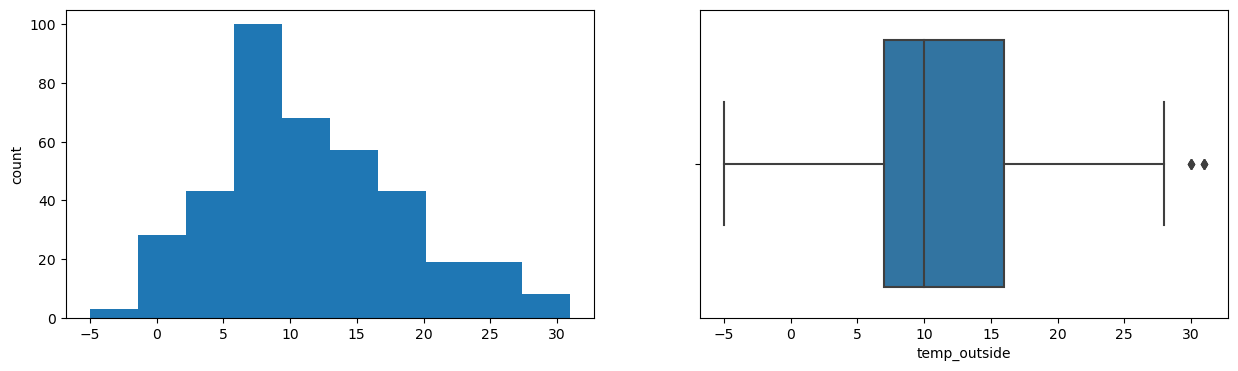

AC
Skew : 3.18


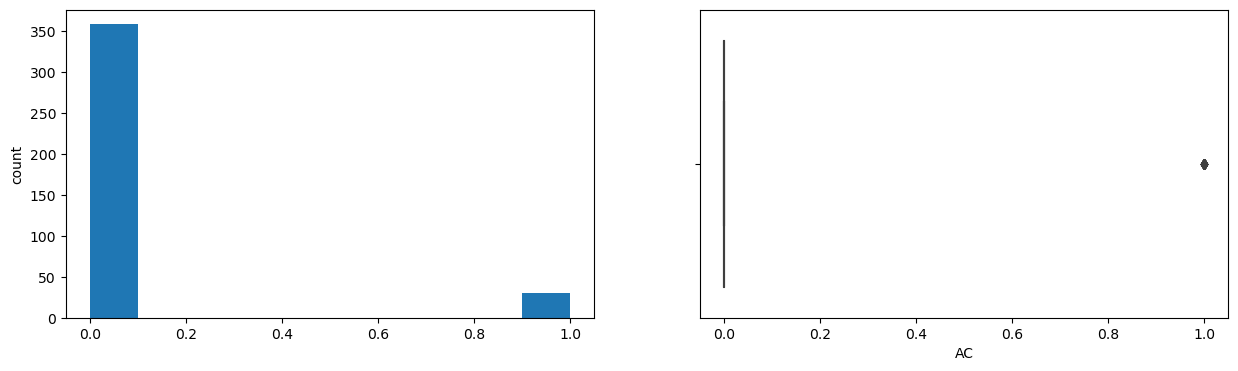

rain
Skew : 2.29


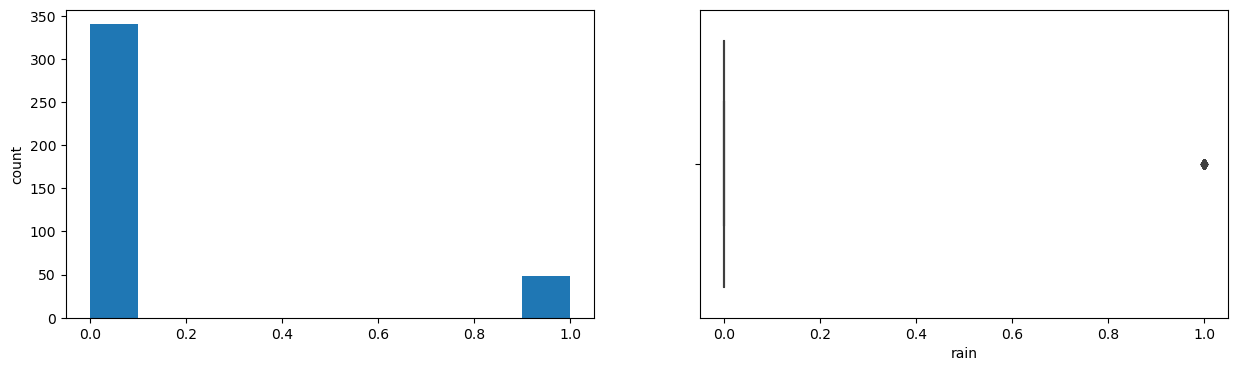

sun
Skew : 3.05


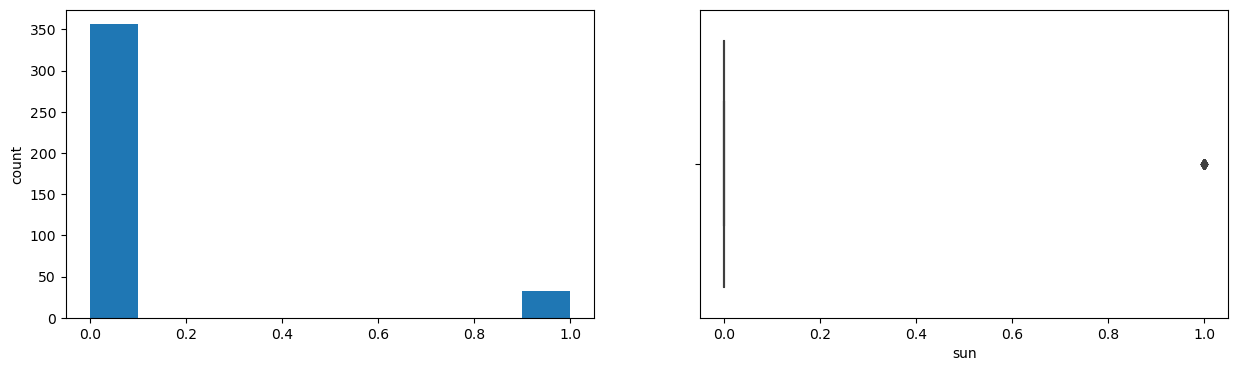

Liter
Skew : 17.23


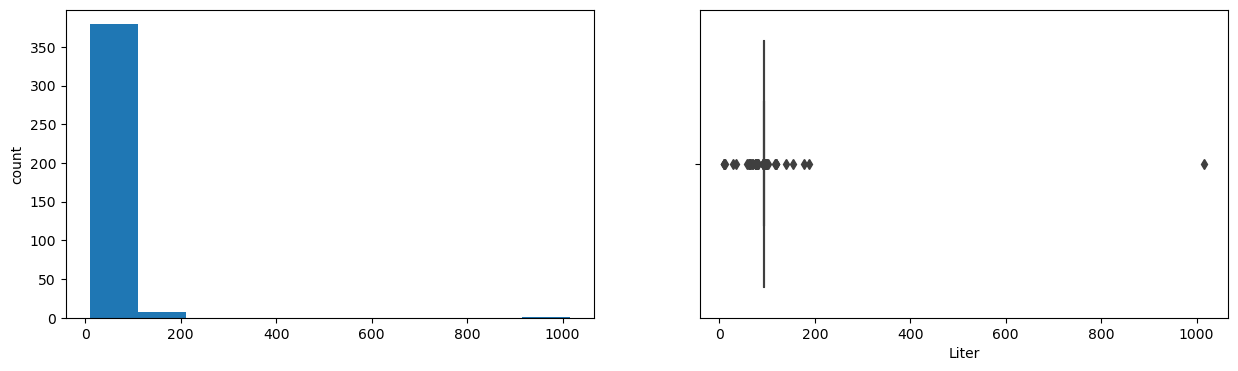

Cost by Type of Gas
Skew : 17.23


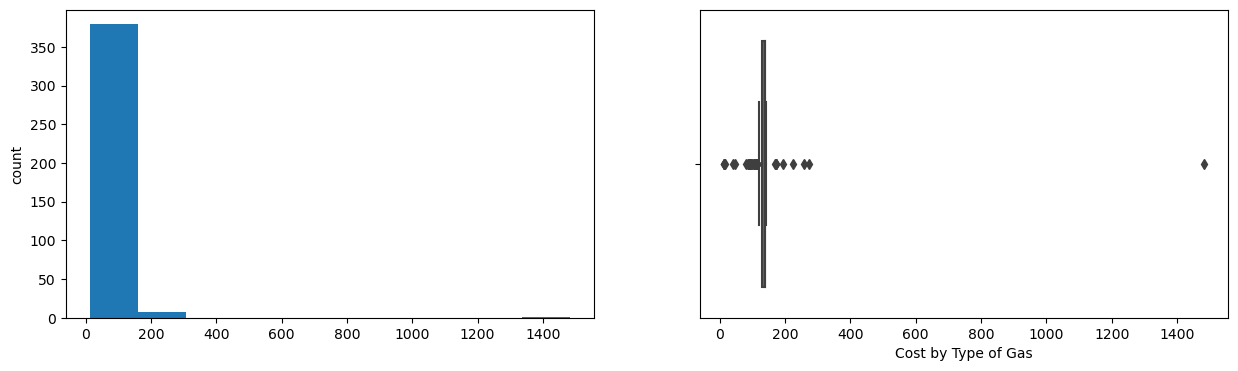

In [30]:
for col in numerical_columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

### Linear Regression/ PM

In [31]:
numerical_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(include=['object'])

In [32]:
numerical_df = numerical_df.reset_index(drop=True) 
numerical_df

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,Liter,Cost by Type of Gas
0,28.000000,5.000000,26,21.934911,12,0,0,0,140.000000,193.200000
1,12.000000,4.816327,30,21.934911,13,0,0,0,57.795918,79.758367
2,19.596154,4.816327,38,21.934911,15,0,0,0,94.381476,130.246436
3,19.596154,4.816327,36,21.934911,14,0,0,0,94.381476,130.246436
4,19.596154,4.816327,46,21.934911,15,0,0,0,94.381476,130.246436
...,...,...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,0,0,0,77.061224,112.509388
384,19.596154,4.816327,38,25.000000,31,1,0,0,94.381476,137.796954
385,16.000000,4.816327,45,25.000000,19,0,0,0,77.061224,112.509388
386,19.596154,4.816327,42,25.000000,31,1,0,0,94.381476,137.796954


In [33]:
corr= numerical_df.loc[:,['distance','speed', 'temp_inside',"temp_outside"]].corr()

<Axes: >

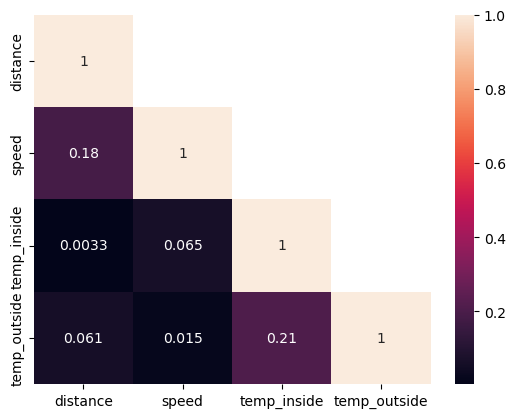

In [34]:
matrix = np.triu(corr)
np.fill_diagonal(matrix,False)
sns.heatmap(corr, annot=True, mask=matrix)

Conclusion*: we do not need to drop any independent variable because these do not have a high correlation between them

In [35]:
categorical_df

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


Our variable "gas_type" is Nominal ( not Hierarque). We can use dummys to do the transformation.

In [36]:
dummy_nominals = ["gas_type"]
categorical_df = pd.get_dummies(categorical_df, columns=dummy_nominals)
dummy_nominals

['gas_type']

In [37]:
categorical_df 

,gas_type_E10,gas_type_SP98
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
383,0,1
384,0,1
385,0,1
386,0,1


In [38]:
#Concatenating
df_model = pd.concat([numerical_df, categorical_df], axis=1)
df_model

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,Liter,Cost by Type of Gas,gas_type_E10,gas_type_SP98
0,28.000000,5.000000,26,21.934911,12,0,0,0,140.000000,193.200000,1,0
1,12.000000,4.816327,30,21.934911,13,0,0,0,57.795918,79.758367,1,0
2,19.596154,4.816327,38,21.934911,15,0,0,0,94.381476,130.246436,1,0
3,19.596154,4.816327,36,21.934911,14,0,0,0,94.381476,130.246436,1,0
4,19.596154,4.816327,46,21.934911,15,0,0,0,94.381476,130.246436,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,0,0,0,77.061224,112.509388,0,1
384,19.596154,4.816327,38,25.000000,31,1,0,0,94.381476,137.796954,0,1
385,16.000000,4.816327,45,25.000000,19,0,0,0,77.061224,112.509388,0,1
386,19.596154,4.816327,42,25.000000,31,1,0,0,94.381476,137.796954,0,1


In [39]:
df_model.to_csv("analysis_best_gas.csv",index=False)

In [40]:
#Splitting the data into independent variables and dependent variable
X=df_model[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'gas_type_E10','gas_type_SP98']]
y=df_model['consume']


In [41]:
#Splitting the data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [42]:
#Checklist

# 1.Tranform our scales using min and max

# 2.To apply the linear regression

# 3.Getting the predictions

# 4.Evaluate the Model

# 5.Classification Report

# 6.Confussion Matriz

# 1. 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaler_train= scaler.transform(X_train)
X_scaler_test= scaler.transform(X_test)

In [43]:
#2.
model_lr = LinearRegression()
model_lr.fit(X_scaler_train, y_train)

LinearRegression()

In [44]:
#3.
y_predictive = model_lr.predict(X_scaler_test)

In [45]:
#4.
mse = mean_squared_error(y_test, y_predictive)
r2 = r2_score(y_test, y_predictive)
mse

0.04578175007062971

In [46]:
r2

-0.06630148990699647

In [47]:
#Coefficients Analysis
coefficients = model_lr.coef_
coefficients 

array([ 0.0399022 , -0.1519818 , -0.11823458, -0.13352184, -0.02976972,
        0.04433137, -0.00946432, -0.02656838,  0.02656838])

In [48]:

a={"independent variables" : ['distance', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'gas_type_E10','gas_type_SP98'],
   'coefficients':[ 0.0399022 , -0.1519818 , -0.11823458, -0.13352184, -0.02976972,
        0.04433137, -0.00946432, -0.02656838,  0.02656838]}

In [49]:
coefficients_analysis = pd.DataFrame(a)

In [50]:
coefficients_analysis

,independent variables,coefficients
0,distance,0.039902
1,speed,-0.151982
2,temp_inside,-0.118235
3,temp_outside,-0.133522
4,AC,-0.029770
5,rain,0.044331
6,sun,-0.009464
7,gas_type_E10,-0.026568
8,gas_type_SP98,0.026568


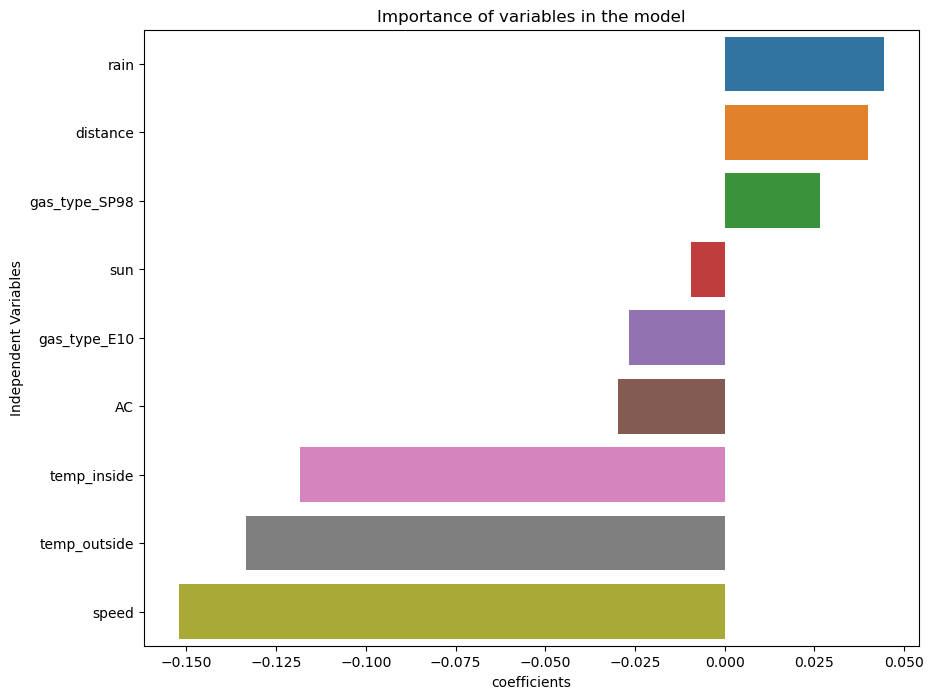

In [51]:

df_orden_importances = coefficients_analysis.sort_values(by='coefficients', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficients', y='independent variables', data=df_orden_importances)
plt.xlabel('coefficients')
plt.ylabel('Independent Variables')
plt.title('Importance of variables in the model')
plt.show()


In [52]:
distance = int(input("Enter distance: "))
rain = int(input("is the day going to be rainy? (1 for yes, 0 for no): "))
sun = int(input("Is the day going to be sunny?(1 for yes, 0 for no): "))
speed = int(input("what is the speed?: "))
AC = int(input("Are you using air-conditioning? (1 for yes, 0 for no): "))
gas_type_E10 = int(input("Are you using gas_type_E10? (1 for yes, 0 for no): "))
gas_type_SP98 = int(input("Are you using gas_type_SP98? (1 for yes, 0 for no): "))
temp_inside = int(input("What was the temperature inside the car?: "))
temp_outside = int(input("What was the temperature outside the car?: "))

Enter distance: 7000
is the day going to be rainy? (1 for yes, 0 for no): 1
Is the day going to be sunny?(1 for yes, 0 for no): 0
what is the speed?: 100
Are you using air-conditioning? (1 for yes, 0 for no): 1
Are you using gas_type_E10? (1 for yes, 0 for no): 0
Are you using gas_type_SP98? (1 for yes, 0 for no): 1
What was the temperature inside the car?: 21
What was the temperature outside the car?: 33


In [53]:
X_example = pd.DataFrame({
    "distance": [distance],
    "speed": [speed],
    "temp_inside": [temp_inside],
    "temp_outside": [temp_outside],
    "AC": [AC],
    "rain": [rain],
    "sun": [sun],
    "gas_type_E10": [gas_type_E10],
    "gas_type_SP98": [gas_type_SP98]
})

# Reorder the columns in X_example to match the order of columns in X_train
X_example = X_example[X_train.columns]

# Scale the X_example DataFrame using the same MinMaxScaler object
X_example_scaled = scaler.transform(X_example)

# Make the prediction using the scaled features
y_example = model_lr.predict(X_example_scaled)

print("Consume:", int(y_example))

Consume: 12
